# Comparison of generated images between the models

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import torch

from principal_RBM_alpha import RBM
from principal_DBN_alpha import DBN
from principal_VAE_MNIST import VAE, train_vae, generate_images, display_images
from download_data import mnist_data
from utils import show_mnist_digits, subsample_data_set, create_dataloader

## Get Data

In [2]:
X_train, X_test, y_train, y_test = mnist_data(path="data/")
X_train, y_train = subsample_data_set(X_train, y_train, nb_data=10000)

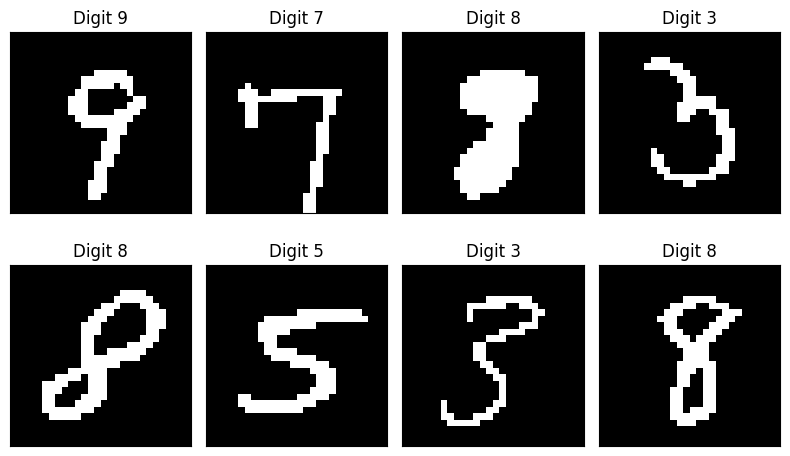

In [3]:
show_mnist_digits(X_train, y_train, 2, 4)

## Train the model and Generate Images

In [4]:
p = 784 #number of visible neurones
q = 316 #number of hidden neurones
EPSILON = 0.1 #learning rate
BATCH_SIZE = 32 #size of the mini-batch
NB_EPOCHS = 100 #number of iterations for gradient descents
NB_GIBBS = 1000 #number of Gibbs sampling steps
NB_DATA = 10 #number of data to generate

### RBM

  Epoch 0/100 : RMSE = 19.552513211029755
  Epoch 20/100 : RMSE = 8.432184878228462
  Epoch 40/100 : RMSE = 6.876330784119797
  Epoch 60/100 : RMSE = 5.986933807243186
  Epoch 80/100 : RMSE = 5.47463448725649


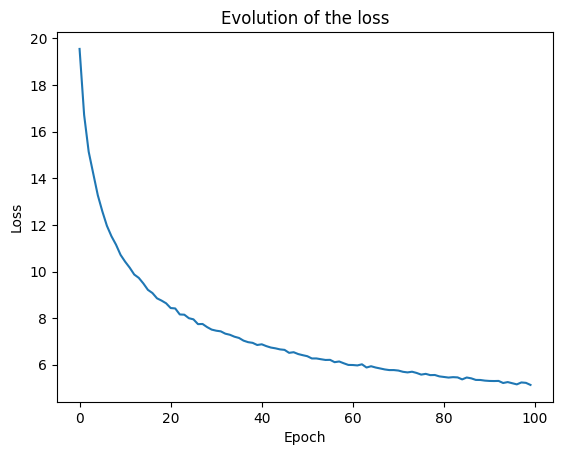

In [5]:
# Create the model
rbm_model = RBM(p=p, q=q) # size of the model = 784*316 = 247_744

# Train the model
rbm_model, loss = rbm_model.train_RBM(X=X_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS, verbose=True)

plt.plot(loss)
plt.title("Evolution of the loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

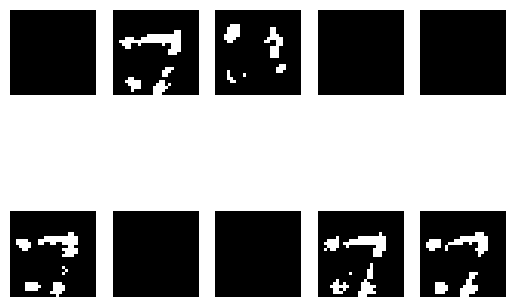

In [6]:
rbm_model.generer_image_RBM(nb_data=NB_DATA, nb_gibbs=NB_GIBBS, type_data="mnist_digits")

### DBN

Training DBN with 3 RBM(s)
Training RBM 1 / 3
  Epoch 0/100 : RMSE = 22.26606033183034
  Epoch 20/100 : RMSE = 10.237856368740857
  Epoch 40/100 : RMSE = 8.540753425270202
  Epoch 60/100 : RMSE = 7.793430812175892
  Epoch 80/100 : RMSE = 7.33860431850575
Training RBM 2 / 3
  Epoch 0/100 : RMSE = 18.31736522072391
  Epoch 20/100 : RMSE = 9.788907996693736
  Epoch 40/100 : RMSE = 8.544861050591736
  Epoch 60/100 : RMSE = 7.801207442142382
  Epoch 80/100 : RMSE = 7.295877799412681
Training RBM 3 / 3
  Epoch 0/100 : RMSE = 5.902480671093195
  Epoch 20/100 : RMSE = 2.8488977500669845
  Epoch 40/100 : RMSE = 2.500927753765286
  Epoch 60/100 : RMSE = 2.43039218966844
  Epoch 80/100 : RMSE = 2.3530591937231127


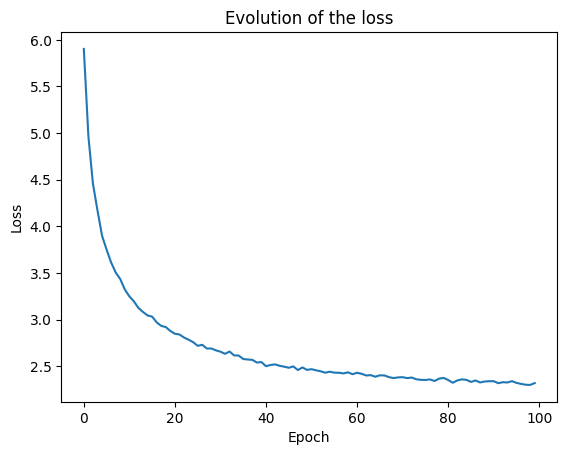

In [9]:
CONFIG = [784, 250, 150, 100]
# Create the model
dbn_model = DBN(config=CONFIG) # size of the model = 784*250 + 250*150 + 150*100 = 248_500

# Train the model
dbn_model, loss = dbn_model.train_DBN(X=X_train, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS, verbose=True)

plt.plot(loss[-1])
plt.title("Evolution of the loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

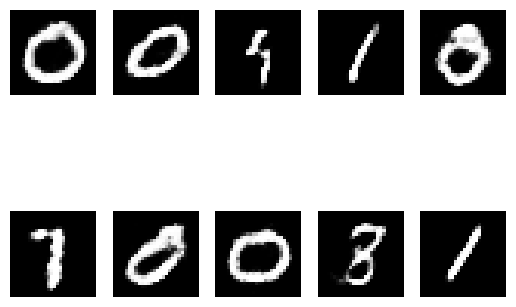

In [10]:
dbn_model.generer_image_DBN(nb_data=NB_DATA, nb_gibbs=NB_GIBBS, type_data="mnist_digits")

### VAE

In [12]:
x_dim = 784
h_dim1 = 140
h_dim2 = 64
z_dim = 10
n_rows = 28
n_cols = 28
n_channels = 1
batch_size = 128

In [13]:
X_loader = create_dataloader(X_train, batch_size=batch_size)

In [14]:
vae_model = VAE(
    x_dim=x_dim,
    h_dim1=h_dim1,
    h_dim2=h_dim2,
    z_dim=z_dim,
    n_rows=n_rows,
    n_cols=n_cols,
    n_channels=n_channels
    ) # size of the model = 784*140 + 140*64 + 64*10*10 + 10*64 + 64*140 + 140*784 = 244_480

optimizer = torch.optim.Adam(vae_model.parameters())

for epoch in range(NB_EPOCHS):
    train_vae(vae_model, optimizer, X_loader, epoch, verbose=True)

/opt/anaconda3/envs/dl2-env-vae/lib/python3.10/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


====> Epoch: 0 Average loss: 284.4749
====> Epoch: 1 Average loss: 201.9362
====> Epoch: 2 Average loss: 193.8505
====> Epoch: 3 Average loss: 186.1226
====> Epoch: 4 Average loss: 175.8144
====> Epoch: 5 Average loss: 163.4543
====> Epoch: 6 Average loss: 155.3594
====> Epoch: 7 Average loss: 149.6561
====> Epoch: 8 Average loss: 144.5757
====> Epoch: 9 Average loss: 140.5366
====> Epoch: 10 Average loss: 136.9674
====> Epoch: 11 Average loss: 133.6899
====> Epoch: 12 Average loss: 131.1694
====> Epoch: 13 Average loss: 128.9413
====> Epoch: 14 Average loss: 126.7724
====> Epoch: 15 Average loss: 124.5597
====> Epoch: 16 Average loss: 122.5131
====> Epoch: 17 Average loss: 120.7629
====> Epoch: 18 Average loss: 119.2504
====> Epoch: 19 Average loss: 117.9215
====> Epoch: 20 Average loss: 116.6700
====> Epoch: 21 Average loss: 115.8288
====> Epoch: 22 Average loss: 114.7772
====> Epoch: 23 Average loss: 113.9372
====> Epoch: 24 Average loss: 112.9498
====> Epoch: 25 Average loss: 112.2

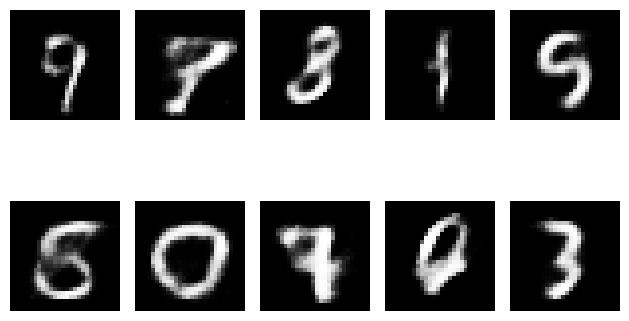

In [15]:
imgs = generate_images(vae_model, n_samples=NB_DATA)
display_images(imgs)